# Importing

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, welch

# 1 - Morris-Lecar Model

In [36]:
def morris_lecar_model(C, g_Ca, g_K, g_L, V_Ca, V_K, V_L, phi, I, dt, time, v_rest=-60):
    """
    Simulate the Morris-Lecar model.
    """
    V = np.zeros(len(time))
    n = np.zeros(len(time))

    V[0] = v_rest
    n[0] = n_inf(V[0])

    for t in range(1, len(time)):
        dV = (1 / C) * (g_Ca * m_inf(V[t-1]) * (V_Ca - V[t-1]) + g_K * n[t-1] * (V_K - V[t-1]) + g_L * (V_L - V[t-1]) + I[t-1])
        V[t] = V[t-1] + dV * dt

        dn = phi * (n_inf(V[t-1]) - n[t-1]) / tau_n(V[t-1])
        n[t] = n[t-1] + dn * dt

    return V, n

def m_inf(v):
    """
    Steady-state activation for calcium current.
    """
    return 0.5 * (1 + np.tanh((v + 1.2) / 18))

def n_inf(v):
    """
    Steady-state activation for potassium current.
    """
    return 0.5 * (1 + np.tanh((v + 0.01) / 10))

def tau_n(v):
    """
    Time constant for potassium channel activation.
    """
    return 1 / np.cosh((v + 0.01) / 20)

In [37]:
def plotting(title, time, V, n, m, I):
    fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

    axs[0].plot(time, I, color="red")
    axs[0].set_ylabel("Input current [mA]")
    axs[0].set_title(title)

    axs[1].plot(time, V)
    max_V = np.max(V)
    max_t_V = time[np.argmax(V)]
    axs[1].plot(max_t_V, max_V, 'ko')
    axs[1].text(max_t_V, max_V, f'{max_V:.1f}', fontsize=8, verticalalignment='bottom')
    axs[1].set_ylabel("Membrane Potential [mV]")

    axs[2].plot(time, n, label="Potassium Activation")
    max_n = np.max(n)
    max_t_n = time[np.argmax(n)]
    axs[2].plot(max_t_n, max_n, 'ko')
    axs[2].text(max_t_n, max_n, f'{max_n:.2f}', fontsize=8, verticalalignment='bottom')

    axs[2].plot(time, m, label="Calcium Activation")
    max_m = np.max(m)
    max_t_m = time[np.argmax(m)]
    axs[2].plot(max_t_m, max_m, 'ko')
    axs[2].text(max_t_m, max_m, f'{max_m:.2f}', fontsize=8, verticalalignment='bottom')

    axs[2].set_ylabel("Channel Activation")
    axs[2].set_xlabel("Time [ms]")
    axs[2].legend()

    plt.tight_layout()
    plt.show()

In [38]:
# simulation parameters
C = 20       # membrane capacitance
g_Ca = 4.4   # conductances across Ca ion channel
g_K = 8      # conductances across K ion channel
g_L = 2      # conductances across L channel
V_Ca = 120   # equilibrium voltages of the ion Ca channel
V_K = -84    # equilibrium voltages of the ion K channel
V_L = -60    # equilibrium voltages of the L channel
phi = 0.04   # reference frequency
dt = 0.1     # time step for integration
t = 1000     # simulation length
time = np.arange(0, t+dt, dt)

## Simulation #1

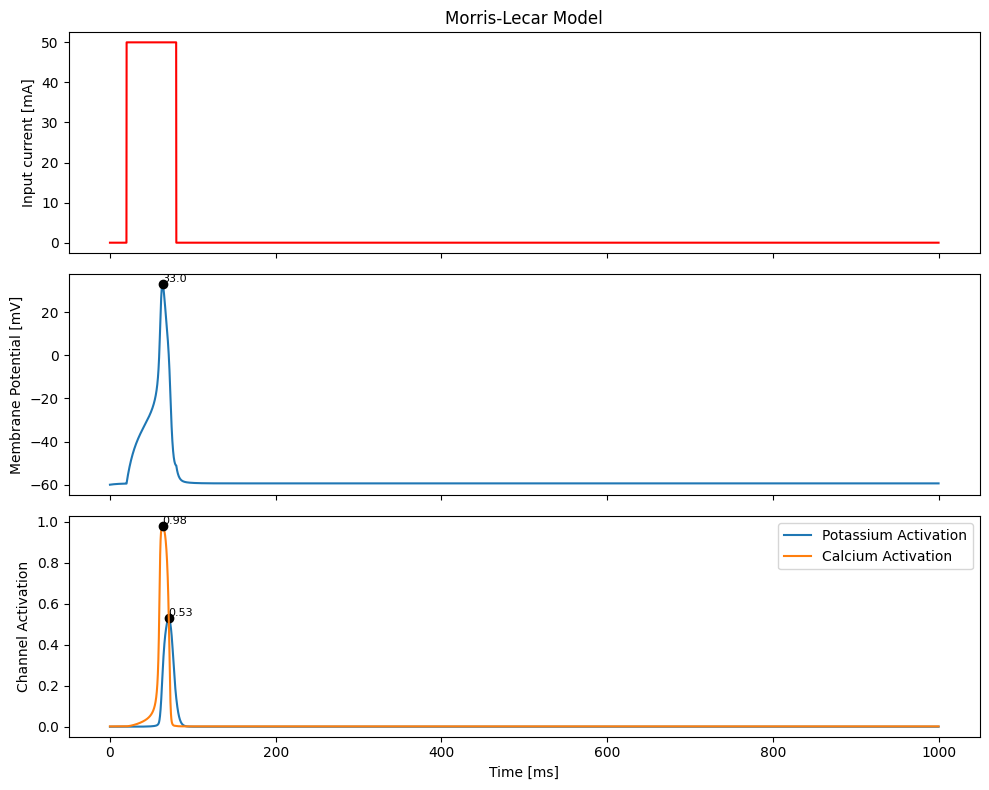

In [39]:
I = 50       # applied current amplitude
s = 200      # start time of the current
d = 600      # time duration of the current
I_ = np.zeros(len(time))
I_[s:s+d] = I

V, n = morris_lecar_model(C, g_Ca, g_K, g_L, V_Ca, V_K, V_L, phi, I_, dt, time)
m = m_inf(V)  # calculate the steady-state activation for calcium
plotting("Morris-Lecar Model", time, V, n, m, I_)

## Simulation #2

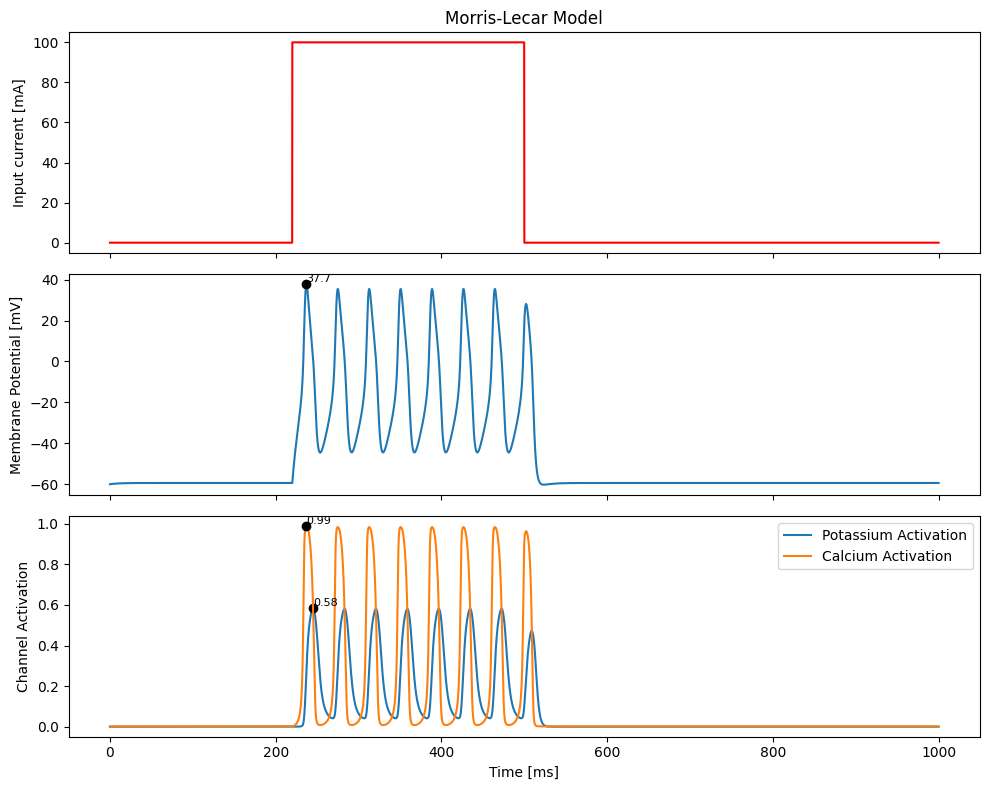

In [40]:
I = 100       # Applied current amplitude
s = 2200      # Start time of the current
d = 2800      # Time duration of the current
I_ = np.zeros(len(time))
I_[s:s+d] = I

V, n = morris_lecar_model(C, g_Ca, g_K, g_L, V_Ca, V_K, V_L, phi, I_, dt, time)
m = m_inf(V)  # Calculate the steady-state activation for calcium
plotting("Morris-Lecar Model", time, V, n, m, I_)

# 2 - Stochastic Morris-Lecar



In [41]:
def morris_lecar_model_stochastic(C, g_Ca, g_K, g_L, V_Ca, V_K, V_L, phi, I, dt, time, noise_intensity, v_rest=-60):
    V = np.zeros(len(time))
    n = np.zeros(len(time))

    V[0] = v_rest
    n[0] = n_inf(V[0])

    for t in range(1, len(time)):
        noise = np.random.normal(0, noise_intensity, 1)[0]

        dV = (1 / C) * (g_Ca * m_inf(V[t-1]) * (V_Ca - V[t-1]) + g_K * n[t-1] * (V_K - V[t-1]) + g_L * (V_L - V[t-1]) + I[t-1]) + noise
        V[t] = V[t-1] + dV * dt

        dn = phi * (n_inf(V[t-1]) - n[t-1]) / tau_n(V[t-1])
        n[t] = n[t-1] + dn * dt

    return V, n

noise_intensity = 0.95  # adjust noise levels

## Simulation #1

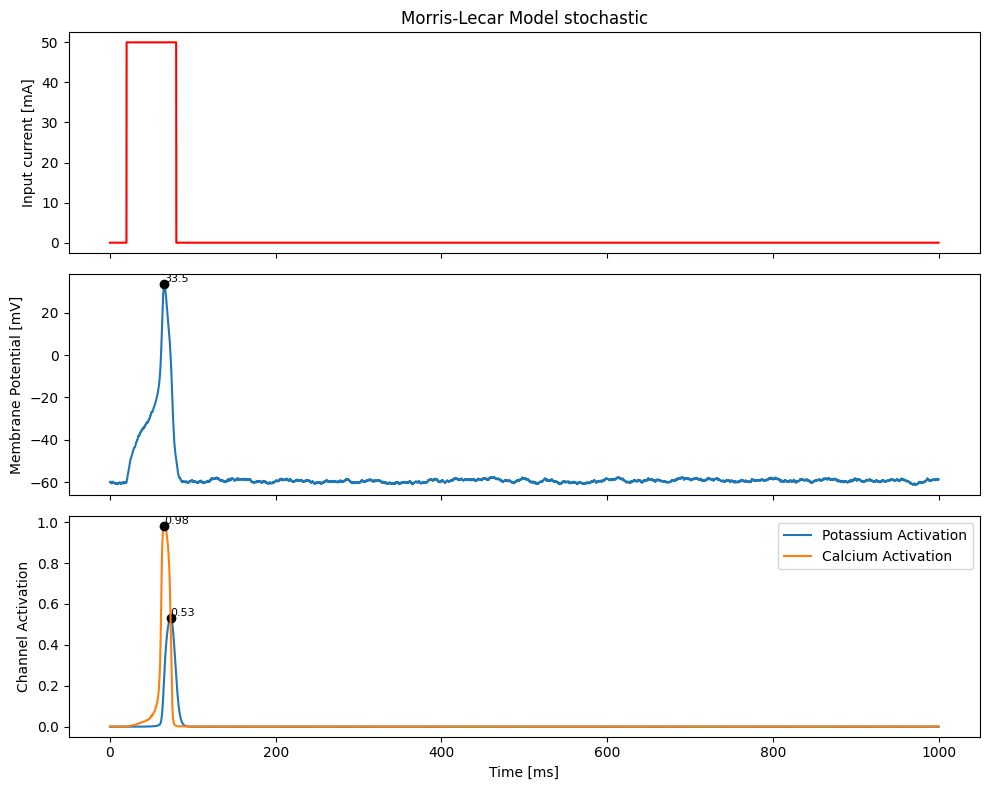

In [42]:
I = 50       # applied current amplitude
s = 200      # start time of the current
d = 600      # time duration of the current
I_ = np.zeros(len(time))
I_[s:s+d] = I

V, n = morris_lecar_model_stochastic(C, g_Ca, g_K, g_L, V_Ca, V_K, V_L, phi, I_, dt, time, noise_intensity)
m = m_inf(V)
plotting("Morris-Lecar Model stochastic", time, V, n, m, I_)

## Simulation #2

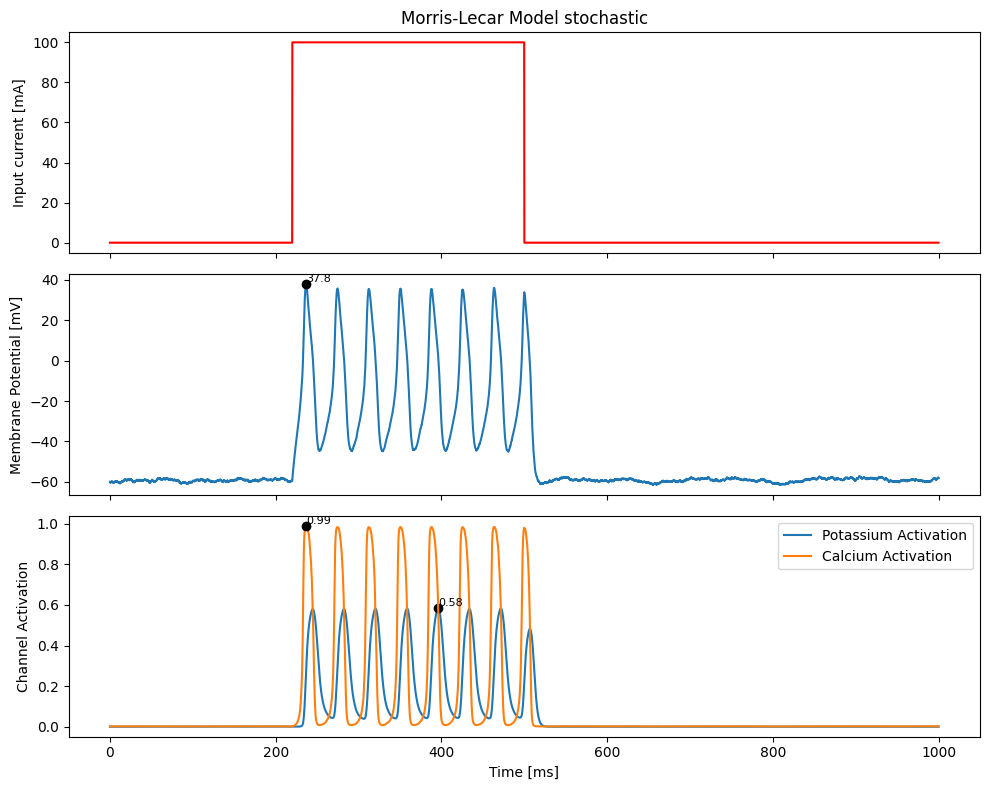

In [43]:
I = 100       # applied current amplitude
s = 2200      # start time of the current
d = 2800      # time duration of the current
I_ = np.zeros(len(time))
I_[s:s+d] = I

V, n = morris_lecar_model_stochastic(C, g_Ca, g_K, g_L, V_Ca, V_K, V_L, phi, I_, dt, time, noise_intensity)
m = m_inf(V)  # calculate the steady-state activation for calcium
plotting("Morris-Lecar Model stochastic", time, V, n, m, I_)

# 3 - Comparison  of MorrisLecar with and without noise

In [44]:
def plotting_combined(title1, title2, time, V1, n1, m1, I1, V2, n2, m2, I2):
    fig, axs = plt.subplots(4, 1, figsize=(12, 10))  # Adjusted for 4 subplots

    # input current
    axs[0].plot(time, I1, color="red", label=title1)
    axs[0].plot(time, I2, color="blue", linestyle="--", label=title2)
    axs[0].set_ylabel("Input Current [mA]")
    axs[0].set_title("Input Current")

    # membrane Potential
    axs[1].plot(time, V1, color="red", label=f"{title1} (Max: {np.max(V1):.2f} mV)")
    axs[1].plot(time, V2, color="blue", linestyle="--", label=f"{title2} (Max: {np.max(V2):.2f} mV)")
    axs[1].set_ylabel("Membrane Potential [mV]")
    axs[1].set_title("Membrane Potential")

    # K Activation
    axs[2].plot(time, n1, color="red", label=f"{title1} (Max: {np.max(n1):.2f})")
    axs[2].plot(time, n2, color="blue", linestyle="--", label=f"{title2} (Max: {np.max(n2):.2f})")
    axs[2].set_ylabel("Potassium Activation")
    axs[2].set_title("Potassium Activation")

    # Ca Activation
    axs[3].plot(time, m1, color="red", label=f"{title1} (Max: {np.max(m1):.2f})")
    axs[3].plot(time, m2, color="blue", linestyle="--", label=f"{title2} (Max: {np.max(m2):.2f})")
    axs[3].set_ylabel("Calcium Activation")
    axs[3].set_xlabel("Time [ms]")
    axs[3].set_title("Calcium Activation")

    for ax in axs:
        ax.legend()

    plt.tight_layout()
    plt.show()

In [45]:
I = 50       # applied current amplitude
s = 200      # start time of the current
d = 600      # time duration of the current
I_ = np.zeros(len(time))
I_[s:s+d] = I

In [46]:
I = 100       # applied current amplitude
s = 2200      # start time of the current
d = 2800      # time duration of the current
I_ = np.zeros(len(time))
I_[s:s+d] = I

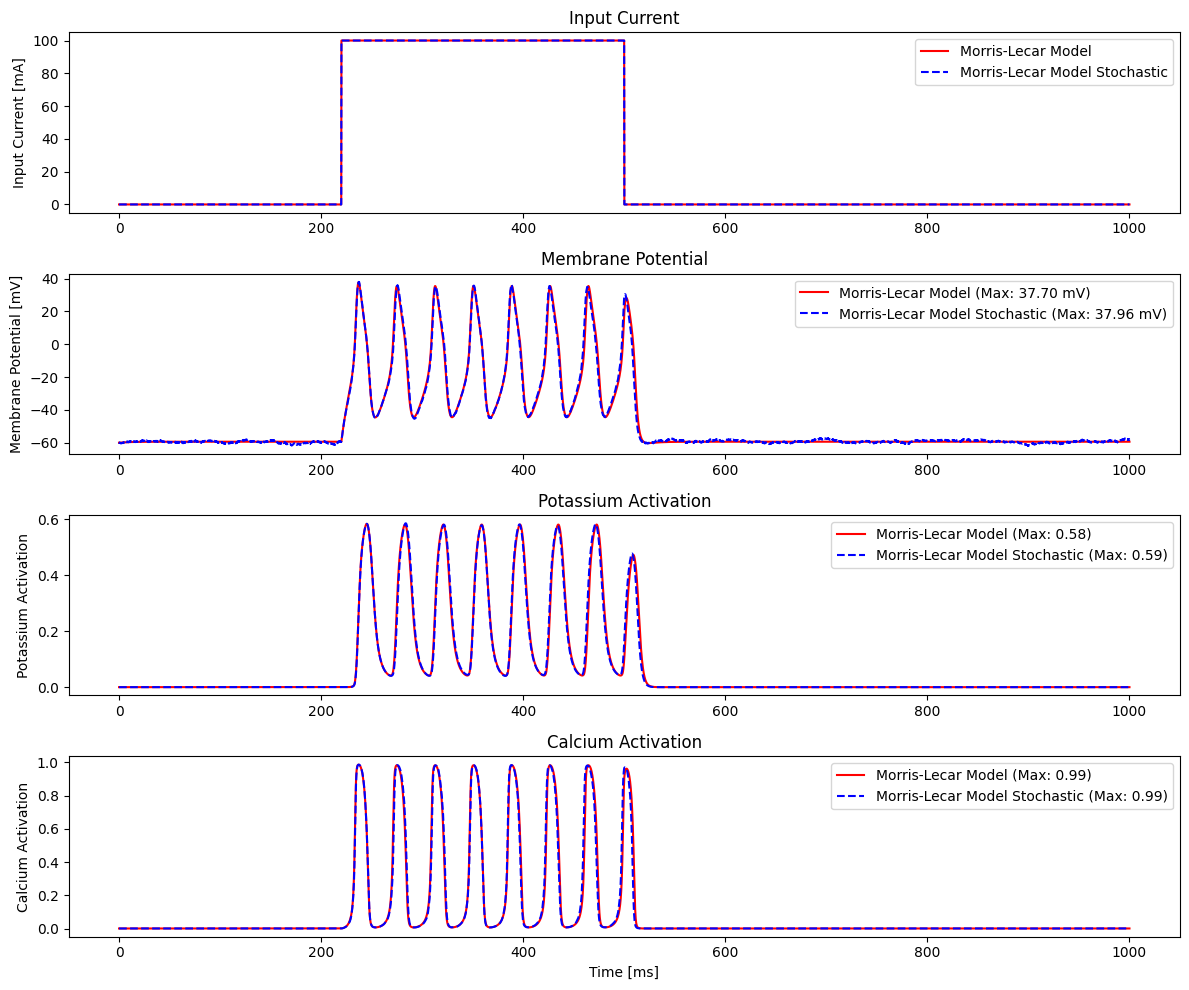

In [47]:
# MorrisLecar model
V_deterministic, n_deterministic = morris_lecar_model(C, g_Ca, g_K, g_L, V_Ca, V_K, V_L, phi, I_, dt, time) # Add your parameters here
m_deterministic = m_inf(V_deterministic)

# Stochastic MorrisLecar model
V_stochastic, n_stochastic = morris_lecar_model_stochastic(C, g_Ca, g_K, g_L, V_Ca, V_K, V_L, phi, I_, dt, time, noise_intensity)
m_stochastic = m_inf(V_stochastic)

plotting_combined("Morris-Lecar Model", "Morris-Lecar Model Stochastic", time, V_deterministic, n_deterministic, m_deterministic, I_, V_stochastic, n_stochastic, m_stochastic, I_)


# 4 - Comparing noise levels

In [48]:
noise_levels = [0, 0.1, 0.5, 0.95, 1.4, 1.8, 3.5]

In [49]:
def run_simulations_with_noise(time, C, g_Ca, g_K, g_L, V_Ca, V_K, V_L, phi, I_, dt, noise_levels):
    results = []
    for noise_intensity in noise_levels:
        V, n = morris_lecar_model_stochastic(C, g_Ca, g_K, g_L, V_Ca, V_K, V_L, phi, I_, dt, time, noise_intensity)
        m = m_inf(V)
        results.append((V, n, m, noise_intensity))
    return results

simulation_results = run_simulations_with_noise(time, C, g_Ca, g_K, g_L, V_Ca, V_K, V_L, phi, I_, dt, noise_levels)

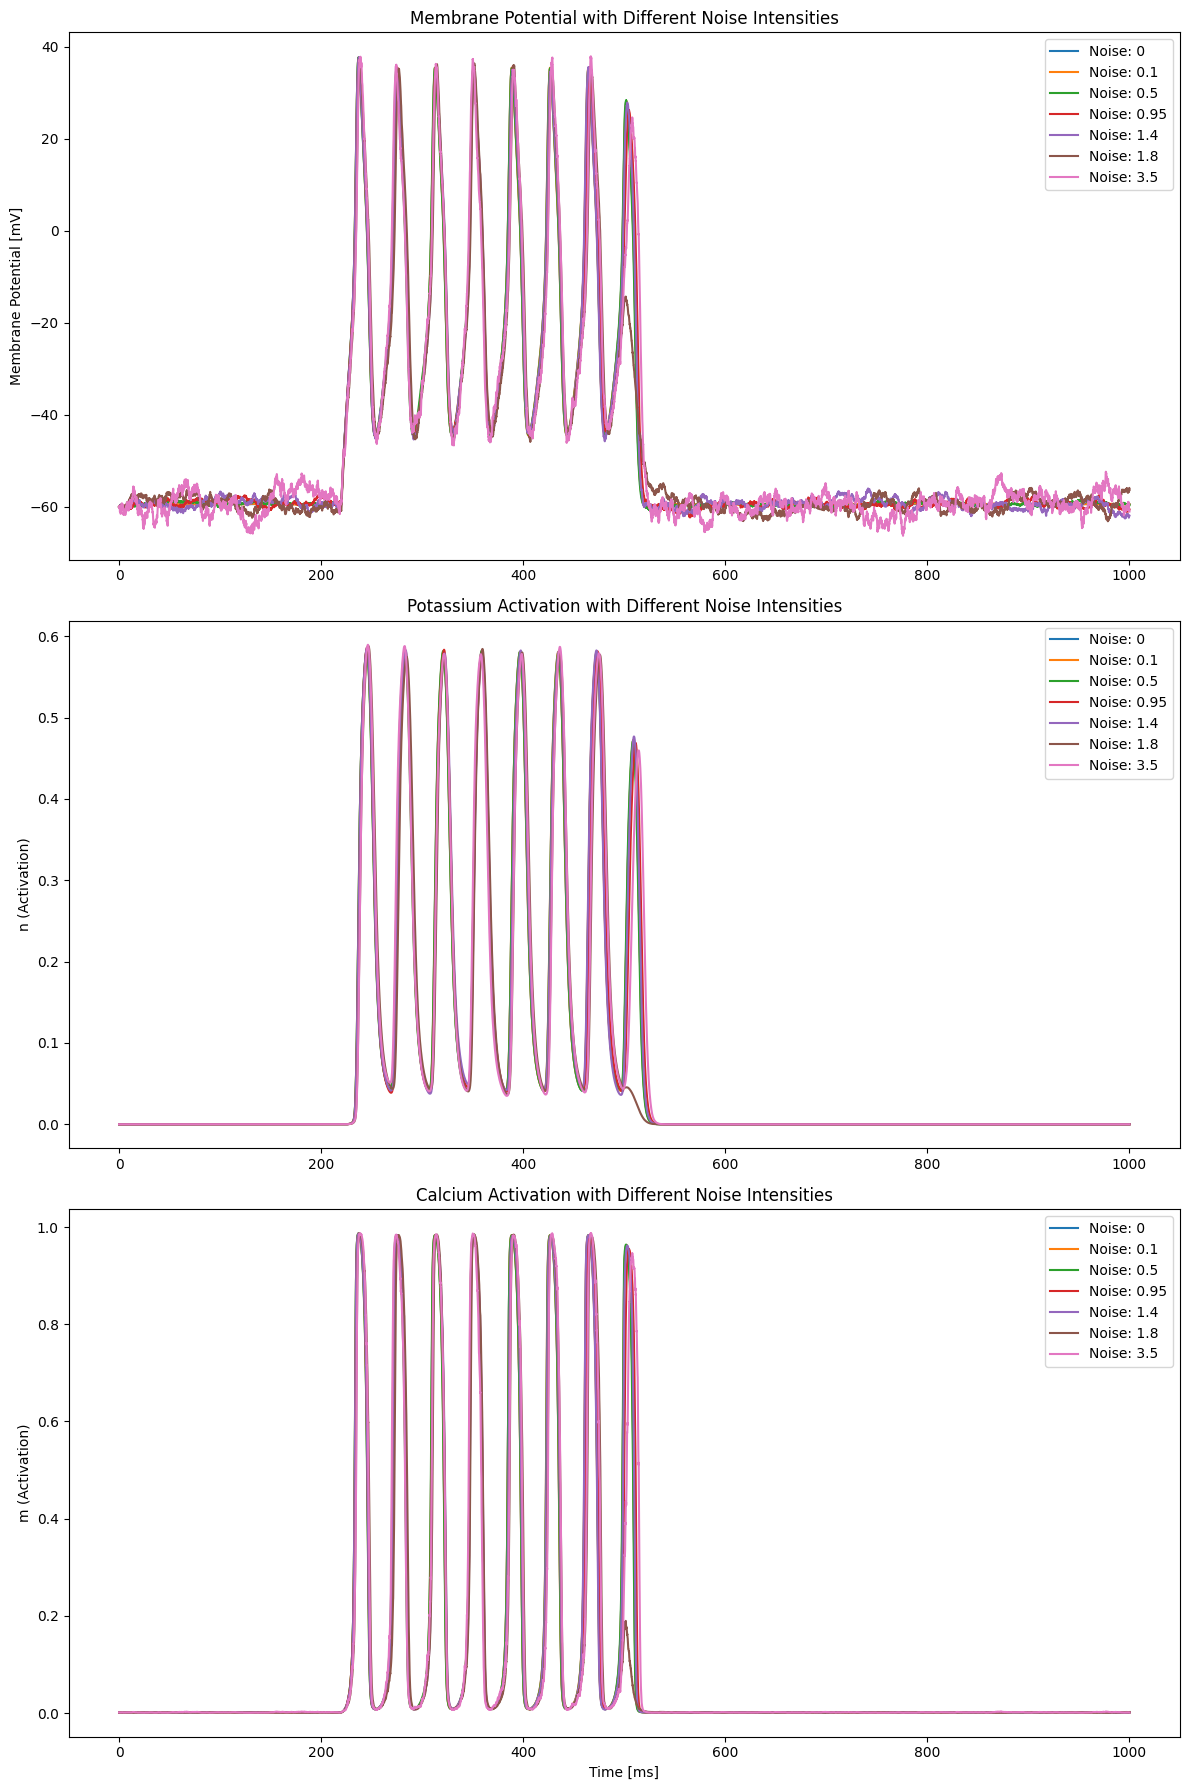

In [50]:
def plot_all_dynamics(time, simulation_results):
    fig, axs = plt.subplots(3, 1, figsize=(12, 18))

    # membrane potentials
    for V, n, m, noise_intensity in simulation_results:
        axs[0].plot(time, V, label=f'Noise: {noise_intensity}')
    axs[0].set_title('Membrane Potential with Different Noise Intensities')
    axs[0].set_ylabel('Membrane Potential [mV]')
    axs[0].legend()

    # potassium activations
    for V, n, m, noise_intensity in simulation_results:
        axs[1].plot(time, n, label=f'Noise: {noise_intensity}')
    axs[1].set_title('Potassium Activation with Different Noise Intensities')
    axs[1].set_ylabel('n (Activation)')
    axs[1].legend()

    # calcium activations
    for V, n, m, noise_intensity in simulation_results:
        axs[2].plot(time, m, label=f'Noise: {noise_intensity}')
    axs[2].set_title('Calcium Activation with Different Noise Intensities')
    axs[2].set_ylabel('m (Activation)')
    axs[2].set_xlabel('Time [ms]')
    axs[2].legend()

    plt.tight_layout()
    plt.show()

plot_all_dynamics(time, simulation_results)

## Coefficient of variation

In [51]:
def calculate_CV_of_ISIs(V, threshold, dt):
    # peaks
    peaks, _ = find_peaks(V, height=threshold)
    # inter-spike intervals
    ISIs = np.diff(peaks) * dt
    # coefficient of variation (CV)
    CV = np.std(ISIs) / np.mean(ISIs)
    return ISIs, CV

def calculate_PSD(V, dt):
    freqs, psd = welch(V, fs=1/dt)
    return freqs, psd


threshold = -20

ISIs_deterministic, CV_deterministic = calculate_CV_of_ISIs(V_deterministic, threshold, dt)
freqs_deterministic, psd_deterministic = calculate_PSD(V_deterministic, dt)

print(f"CV for deterministic model: {CV_deterministic}")

CVs_stochastic = []
PSDs_stochastic = []

for V, n, m, noise_intensity in simulation_results:
    ISIs, CV = calculate_CV_of_ISIs(V, threshold, dt)
    CVs_stochastic.append((CV, noise_intensity))

    freqs, psd = calculate_PSD(V, dt)
    PSDs_stochastic.append((freqs, psd, noise_intensity))

for CV, noise_intensity in CVs_stochastic:
    print(f"CV for noise level {noise_intensity}: {CV}")

CV for deterministic model: 0.0018479741552494347
CV for noise level 0: 0.0018479741552494347
CV for noise level 0.1: 0.0011928621879170878
CV for noise level 0.5: 0.3757816109826602
CV for noise level 0.95: 1.112245775929323
CV for noise level 1.4: 1.4165463012464525
CV for noise level 1.8: 1.7739824655087923
CV for noise level 3.5: 2.301646333725249


## Power Spectral Density

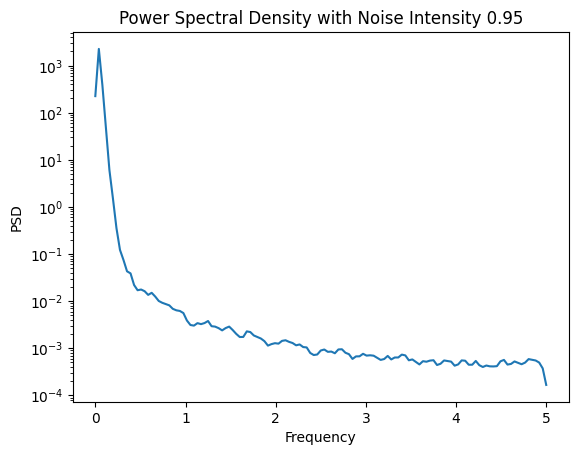

In [52]:
index_to_plot = 3
freqs, psd, noise_intensity = PSDs_stochastic[index_to_plot]

plt.figure()
plt.semilogy(freqs, psd)
plt.title(f'Power Spectral Density with Noise Intensity {noise_intensity}')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.show()

# 5 - Phase Plane

## Potassium Phase Plane

In [53]:
def phase_plane_analysis(V, n, m, time):
    plt.figure(figsize=(8, 6))
    plt.plot(V, n, label='Phase Plane')
    plt.xlabel('Membrane Potential')
    plt.ylabel('Potassium Activation (n)')
    plt.title('Phase Plane Analysis')
    plt.legend()
    plt.show()

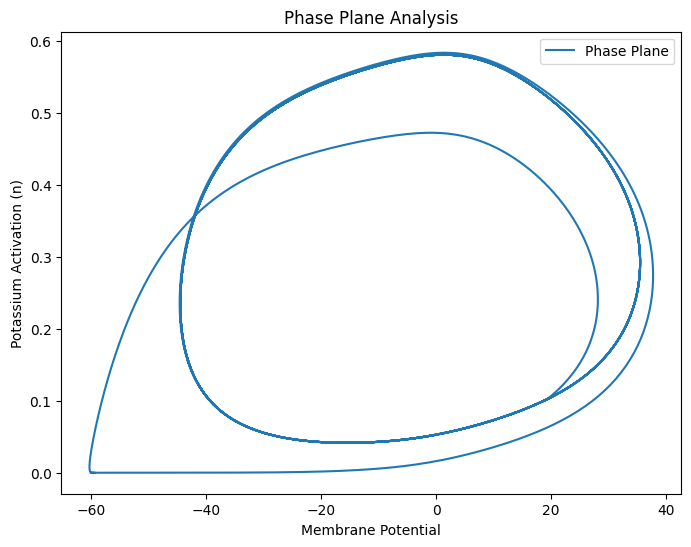

In [54]:
phase_plane_analysis(V_deterministic, n_deterministic, m_deterministic, time)

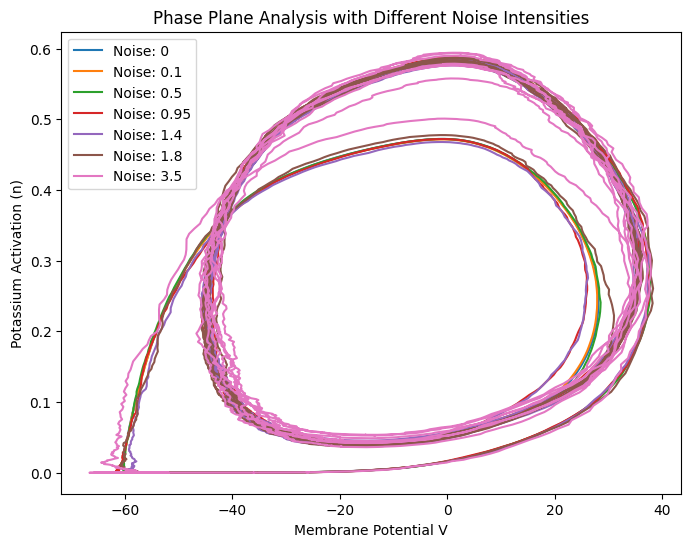

In [55]:
plt.figure(figsize=(8, 6))

for noise_intensity in noise_levels:
    V, n = morris_lecar_model_stochastic(C, g_Ca, g_K, g_L, V_Ca, V_K, V_L, phi, I_, dt, time, noise_intensity)
    plt.plot(V, n, label=f'Noise: {noise_intensity}')

plt.xlabel('Membrane Potential V')
plt.ylabel('Potassium Activation (n)')
plt.title('Phase Plane Analysis with Different Noise Intensities')
plt.legend()
plt.show()

## Calcium Phase Plane

In [56]:
def phase_plane_analysis_m(V, m, time):
    plt.figure(figsize=(8, 6))
    plt.plot(V, m, label='Phase Plane')
    plt.xlabel('Membrane Potential')
    plt.ylabel('Calcium Activation (m)')
    plt.title('Phase Plane Analysis')
    plt.legend()
    plt.show()

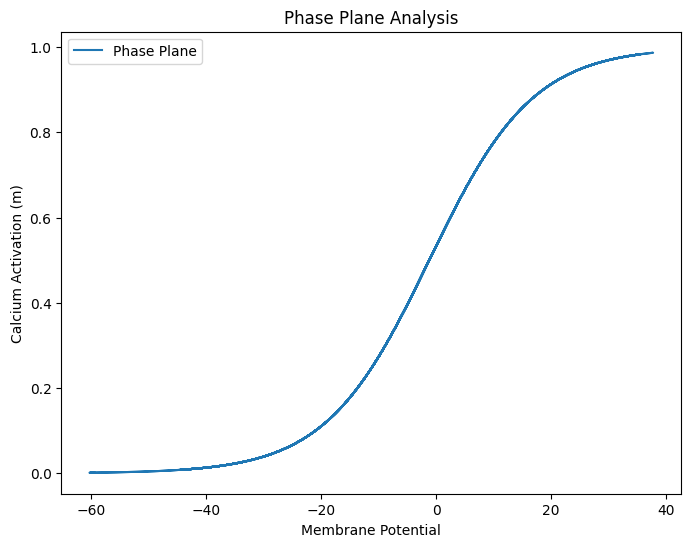

In [57]:
phase_plane_analysis_m(V_deterministic, m_deterministic, time)

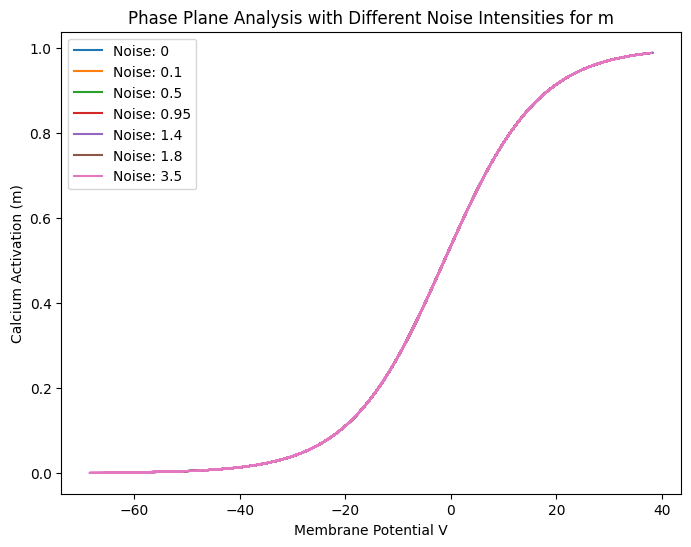

In [58]:
plt.figure(figsize=(8, 6))

for noise_intensity in noise_levels:
    V, _ = morris_lecar_model_stochastic(C, g_Ca, g_K, g_L, V_Ca, V_K, V_L, phi, I_, dt, time, noise_intensity)
    m = m_inf(V)
    plt.plot(V, m, label=f'Noise: {noise_intensity}')

plt.xlabel('Membrane Potential V')
plt.ylabel('Calcium Activation (m)')
plt.title('Phase Plane Analysis with Different Noise Intensities for m')
plt.legend()
plt.show()

# 6 - Bifurcation

## Bifurcation Diagram with Varying Noise Intensity

In [59]:
noise_intensities = np.linspace(min(noise_levels), max(noise_levels), 50)
representative_V = []

for noise_intensity in noise_intensities:
    V, n = morris_lecar_model_stochastic(C, g_Ca, g_K, g_L, V_Ca, V_K, V_L, phi, I_, dt, np.arange(0, 1000, dt), noise_intensity)
    representative_V.append(np.mean(V[-int(0.1*len(V)):]))

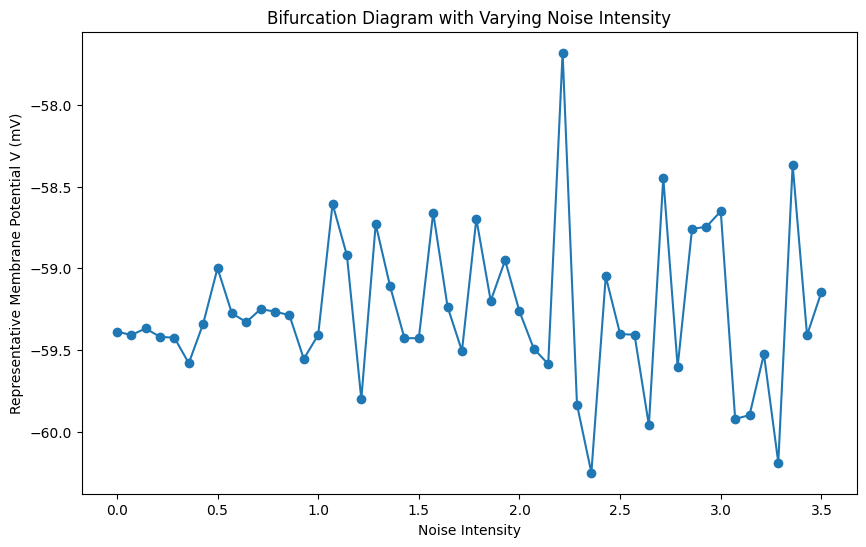

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(noise_intensities, representative_V, 'o-')
plt.xlabel('Noise Intensity')
plt.ylabel('Representative Membrane Potential V (mV)')
plt.title('Bifurcation Diagram with Varying Noise Intensity')
plt.show()

## Bifurcation Diagram with Varying Input Current

In [61]:
I_values = np.linspace(0, 200, 100)
steady_state_V = []

for I in I_values:
    I_ = np.ones(10000) * I
    V, n = morris_lecar_model(C, g_Ca, g_K, g_L, V_Ca, V_K, V_L, phi, I_, dt, np.arange(0, 1000, dt))
    steady_state_V.append(V[-1])

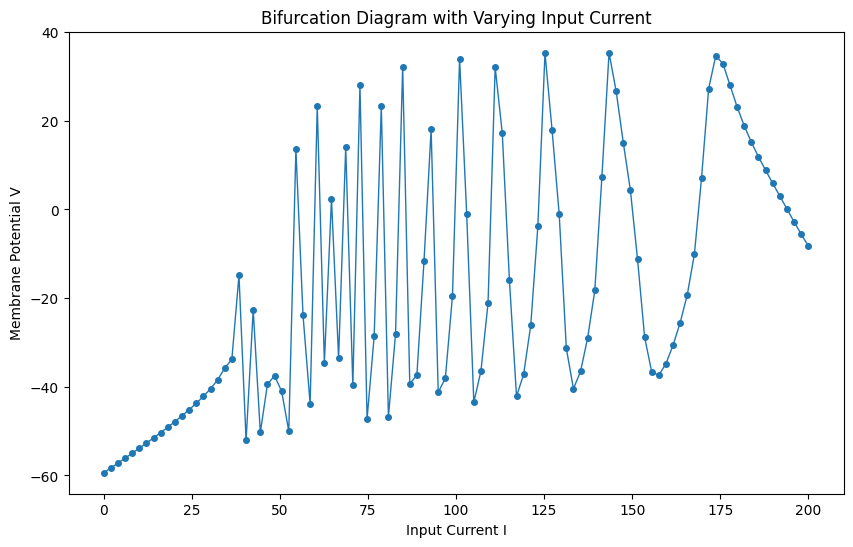

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(I_values, steady_state_V, '-o', markersize=4, linewidth=1, label='Steady State V')
plt.xlabel('Input Current I')
plt.ylabel('Membrane Potential V')
plt.title('Bifurcation Diagram with Varying Input Current')
plt.show()



---



#7 - FitzHugh-Nagumo model


In [63]:
def fitzhugh_nagumo_model(a, b, epsilon, I, dt, time, v_init, w_init):
    """
    Simulate the FitzHugh-Nagumo model.
    """
    v = np.zeros(len(time))
    w = np.zeros(len(time))

    v[0] = v_init
    w[0] = w_init

    for t in range(1, len(time)):
        dv = v[t-1] - (v[t-1]**3) / 3 - w[t-1] + I[t-1]
        dw = epsilon * (v[t-1] + a - b*w[t-1])

        v[t] = v[t-1] + dv * dt
        w[t] = w[t-1] + dw * dt

    return v, w

In [64]:
# model Parameters
a = 0.7
b = 0.8
epsilon = 0.08
v_init = -1.0  # initial condition for v
w_init = 1.0   # initial condition for w
dt = 0.1     # time step for integration
t = 1000     # simulation length
time = np.arange(0, t+dt, dt)



---


#8 - Comparison of Morris-Lecar with FitzHugh-Nagumo

In [65]:
I = 50       # applied current amplitude
s = 200      # start time of the current
d = 600      # time duration of the current
I_ = np.zeros(len(time))
I_[s:s+d] = I

In [66]:
#I = 100       # applied current amplitude
#s = 2200      # start time of the current
#d = 2800      # time duration of the current
#I_ = np.zeros(len(time))
#I_[s:s+d] = I

In [67]:
def compare_models(time, I, C, g_Ca, g_K, g_L, V_Ca, V_K, V_L, phi, dt, a, b, epsilon, v_init, w_init):
    """
    Compare the Morris-Lecar model with the FitzHugh-Nagumo model.
    """
    # MorrisLecar model
    V_ml, n_ml = morris_lecar_model(C, g_Ca, g_K, g_L, V_Ca, V_K, V_L, phi, I, dt, time)
    m_ml = m_inf(V_ml)

    # FitzHugh-Nagumo model
    v_fn, w_fn = fitzhugh_nagumo_model(a, b, epsilon, I, dt, time, v_init, w_init)

    fig, axs = plt.subplots(2, 1, figsize=(12, 10))

    axs[0].plot(time, I, label="Input Current")
    axs[0].set_ylabel('Current (I)')
    axs[0].set_title('Input Current Over Time')

    axs[1].plot(time, V_ml, label="Morris-Lecar V(t)")
    axs[1].set_ylabel('Membrane Potential (V)')
    axs[1].set_title('Morris-Lecar Model Membrane Potential')

    axs[1].plot(time, v_fn, label="FitzHugh-Nagumo v(t)", linestyle="--")
    axs[1].legend()

    plt.tight_layout()
    plt.show()


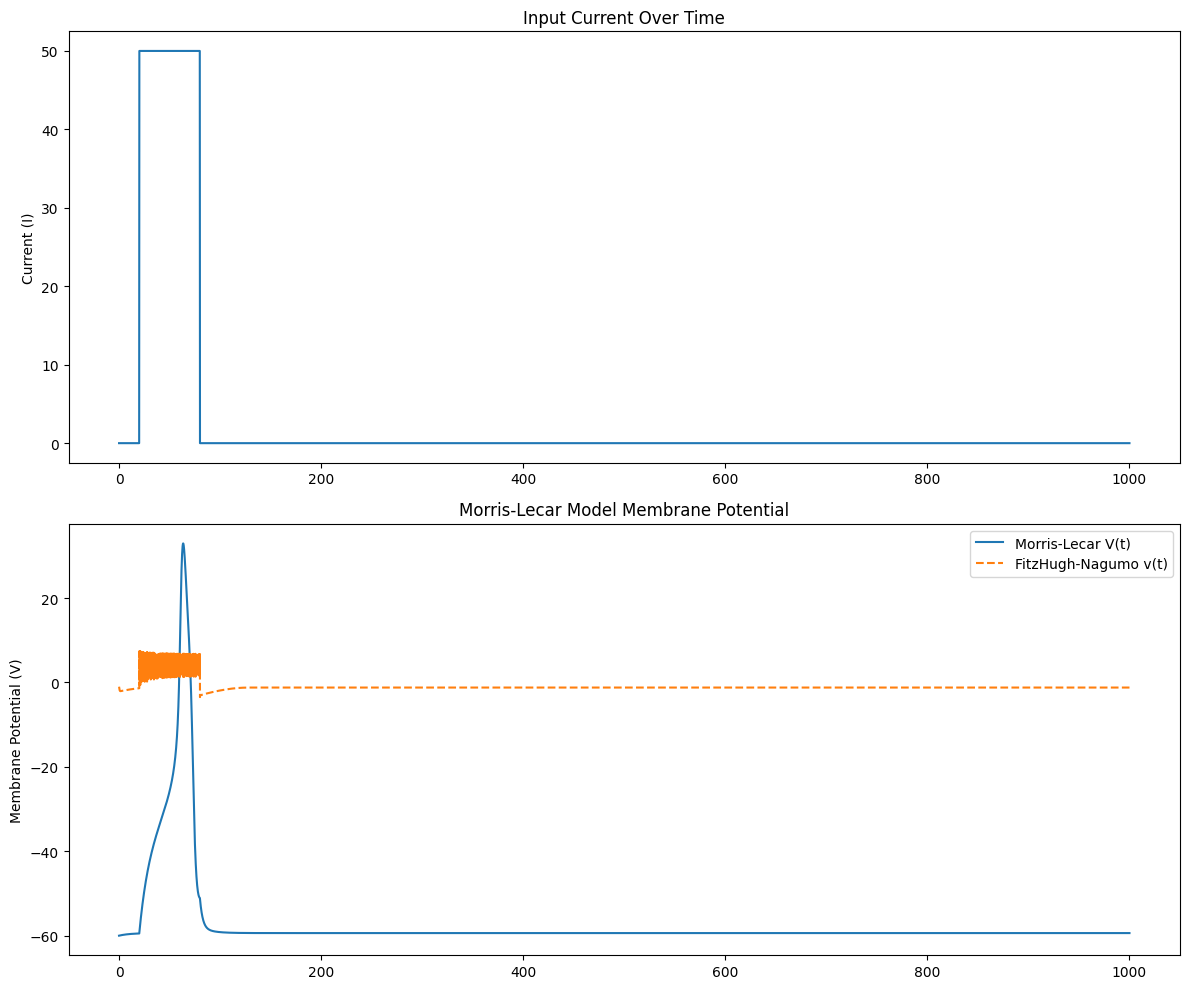

In [68]:
compare_models(time, I_, C, g_Ca, g_K, g_L, V_Ca, V_K, V_L, phi, dt, a, b, epsilon, v_init, w_init)